<IPython.core.display.Javascript object>


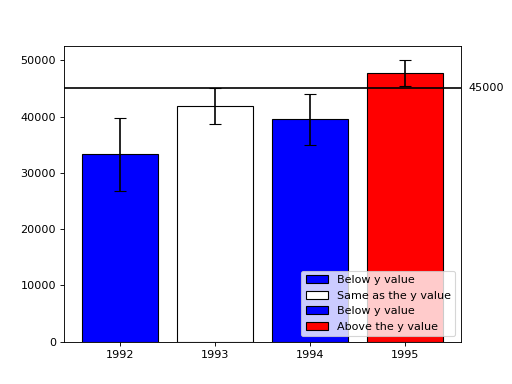

Enter desired line height: 
45000


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

%matplotlib notebook

fig, ax = plt.subplots()

std_dev = df.std(axis=1)

smp_size = 3650

samp_mean = df.mean(axis=1)

SEM = (std_dev.div(np.sqrt(3650))*1.96).values.tolist()

y = input('Enter desired line height: \n')
    # below works because it produces an object
bars = plt.bar(df.index,
                samp_mean,
                color='white',
                edgecolor='black',
                yerr=SEM,
                capsize=5.0)
    # for the yerr input is a seq of the pre-calculated SEM values, doesn't calc for you
    # capsize is the size of the error caps on the error bars

        
    # bar chart with the index of the df, and the plot info from the mean df
plt.xticks(df.index)
    # changed plt ticks to only the index values from the df
plt.gca().axhline(float(y),color='black')

for i, bar in enumerate(bars):
    
    if (bar.get_height() + SEM[i]) < float(y):
    
        bar.set_facecolor('blue')
        
        bar.set_label('Below y value')
        
    if (bar.get_height() - SEM[i]) < float(y) and float(y) < (bar.get_height() + SEM[i]):
        
        bar.set_facecolor('white')
        
        bar.set_label('Same as the y value')
        
    if (bar.get_height() - SEM[i]) > float(y):
        
        bar.set_facecolor('red')
        
        bar.set_label('Above the y value')

plt.text(1.02, float(y),
         y,
         va='center',
         ha='left',
         transform=ax.get_yaxis_transform())

plt.legend(loc=4)